In [1]:
## importing required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt                         

In [4]:
## reading the csv file 
df=pd.read_csv(r"C:\Users\admin\Ulabox Ecommerce.csv\Ulabox.csv")
df.columns                                              

Index(['customer', 'order', 'total_items', 'discount%', 'weekday', 'hour',
       'Food%', 'Fresh%', 'Drinks%', 'Home%', 'Beauty%', 'Health%', 'Baby%',
       'Pets%'],
      dtype='object')

## Dataset Description

The dataset used  is for 30000 orders that represent approximately 10000 customers. The dataset contains 30000 rows and 14 columns. 

Fields:
 * Order: There are 30000 orders and each order has a different order number.
 * Customer: +10000 customers and they placed multiple orders.
 * Total Items: Total number of items bought per order per customer on a given day in a given hour.
 * Discount: Total Discount a customer got - on each order - is given in percentage (or fraction).
 * Weekday: The day on which an order was placed. Week numbers are not given. Days are from 1 = Monday to 7 = Sunday.
 * Hour: Hour of the day when order was placed. 0 is midnight and 23 is last hour of the day.
 * Categories(8 columns for 8 different categories): There are 8 categories and their columns represent “the percentage (or fraction) of total payment that was made into each category”.


In [5]:
df

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,10235,29995,4,0.00,5,10,5.80,0.00,51.30,0.00,0.00,0.00,0.0,42.9
29996,10236,29996,1,0.00,7,21,0.00,0.00,0.00,0.00,100.00,0.00,0.0,0.0
29997,10237,29997,54,0.00,4,17,9.25,0.00,77.48,13.27,0.00,0.00,0.0,0.0
29998,10237,29998,10,0.00,5,10,0.00,0.00,100.00,0.00,0.00,0.00,0.0,0.0


In [7]:
## dataframe with mean of total items bought by a customer
df1=df[['customer','total_items']]                                 

In [13]:
df1=df1.groupby(['customer']).mean()            

In [14]:
## dataframe with an average number of items bought by each customer
df1

,total_items
customer,
0,44.666667
1,31.150000
2,26.000000
3,27.782609
4,17.103448
...,...
10234,1.000000
10235,4.000000
10236,1.000000


In [15]:
## dataframe with mean of discount% offered to customers 
df2=df[['customer','discount%']]

In [16]:
df2=df2.groupby(['customer']).mean()

In [17]:
df2

,discount%
customer,
0,14.110000
1,17.849000
2,2.970000
3,4.102174
4,4.373103
...,...
10234,0.000000
10235,0.000000
10236,0.000000


In [18]:
count=df['customer'].value_counts()
df3=pd.DataFrame(count).sort_index()                                     #getting the number of purchases for each customer
df3=df3.rename(columns = {"customer":"customer_purchases"})  

In [19]:
df3

,customer_purchases
0,3
1,20
2,1
3,23
4,29
...,...
10234,1
10235,1
10236,1
10237,2


In [21]:
## creating a dataframe for analysis with previously calculated values for each customer
df4=pd.concat([df1,df2,df3], axis=1)         

In [22]:
df4  

,total_items,discount%,customer_purchases
0,44.666667,14.110000,3
1,31.150000,17.849000,20
2,26.000000,2.970000,1
3,27.782609,4.102174,23
4,17.103448,4.373103,29
...,...,...,...
10234,1.000000,0.000000,1
10235,4.000000,0.000000,1
10236,1.000000,0.000000,1
10237,32.000000,0.000000,2


**Scatter Plot for analysing customer behaviour based on the discount% offered**

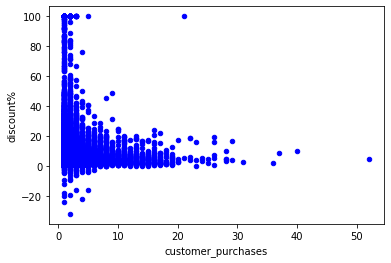

In [23]:
df4.plot(kind='scatter',y='discount%',x='customer_purchases',color='blue')
plt.show()

**Scatter Plot for analysis of number of items bought by customers at different discount rates**

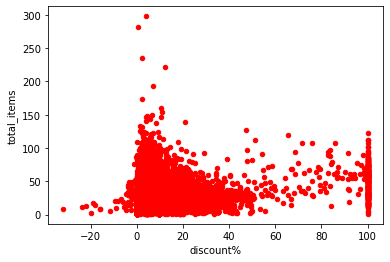

In [24]:
df4.plot(kind='scatter',y='total_items',x='discount%',color='red')
plt.show()

**Scatter plot for the number of customer purchases against total number of items bought**

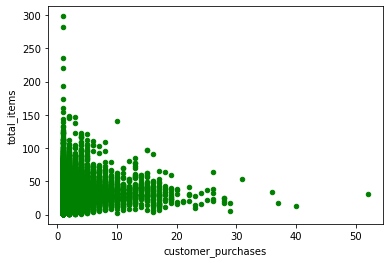

In [25]:
df4.plot(kind='scatter',y='total_items',x='customer_purchases',color='green')
plt.show()

In [26]:
y=df4['discount%']
df5=df4.drop(['discount%'],axis=1)

In [27]:
df5

,total_items,customer_purchases
0,44.666667,3
1,31.150000,20
2,26.000000,1
3,27.782609,23
4,17.103448,29
...,...,...
10234,1.000000,1
10235,4.000000,1
10236,1.000000,1
10237,32.000000,2


In [30]:
## creating a dataframe with data required for further analysis
df6=df4[['total_items','customer_purchases','discount%']]

In [32]:
df6

,total_items,customer_purchases,discount%
0,44.666667,3,14.110000
1,31.150000,20,17.849000
2,26.000000,1,2.970000
3,27.782609,23,4.102174
4,17.103448,29,4.373103
...,...,...,...
10234,1.000000,1,0.000000
10235,4.000000,1,0.000000
10236,1.000000,1,0.000000
10237,32.000000,2,0.000000


## Data visualizations using the K-means algorithm for analysis

### Plot 1

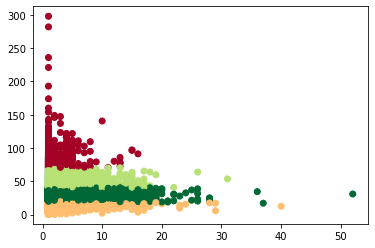

In [36]:
## Plot for total number of items bought against number of purchases
df7=df6[['customer_purchases','total_items']]
kmeans = KMeans(n_clusters=4, random_state=50,max_iter=500).fit(df7.values)
df7['loyalty']=kmeans.labels_
plt.scatter(x=df7['customer_purchases'], 
            y=df7['total_items'],
           c=df7['loyalty'], cmap=plt.cm.RdYlGn )

#### Inferences:
Points that lie in the light and dark green clusters represent customers that make a purchase of a decent number of items, at the store, frequently. Since thier buying frequency is neither too high nor too low these customers can be considered as loyal customers. 

### Plot 2

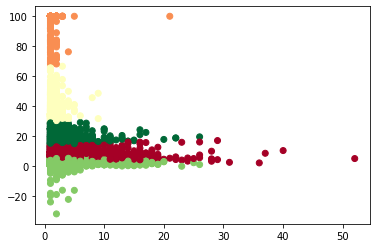

In [37]:
## Plot for discount% offered against number of purchases
df7=df6[['customer_purchases','discount%']]
kmeans = KMeans(n_clusters=5, random_state=50,max_iter=500).fit(df7.values)
df7['loyalty']=kmeans.labels_
plt.scatter(x=df7['customer_purchases'], 
            y=df7['discount%'],
           c=df7['loyalty'], cmap=plt.cm.RdYlGn )

#### Inferences
* Points that lie in the Yellow and orange clusters represent customers that make a purchase only when a huge discount is offered. Therefore, they may be considered as unloyal customers.

* The light green cluster represents walk-in customers. These customers would not harm the sales but cannot be considered as loyal customers either.

* The red and dark green clusters represent customers that bought a considerable number of items even at lower discount rates. Customers that fall under this category can be considered as regular/loyal customers, having maximum number of customers in these two clusters would be profitable for the store.

### Plot 3

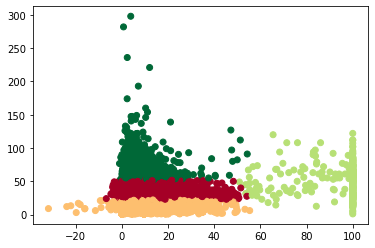

In [33]:
## Plot for total number of items bought against discount% offered
df7=df6[['total_items','discount%']]
kmeans = KMeans(n_clusters=4, random_state=50,max_iter=500).fit(df7.values)
df7['loyalty']=kmeans.labels_
plt.scatter(y=df7['total_items'], 
            x=df7['discount%'],
           c=df7['loyalty'], cmap=plt.cm.RdYlGn )

#### Inferences

* The dark green cluster comprises of multiple data points with a large number of total items bought. Ideally, a customer that would buy an average number of items with high frequency would be considered a loyal customer, therefore, the green cluster represents unloyal customers.

* The points that lie under the peach and red clusters have a low number of total items bought and a discount rate from 0%-50%. These two clusters represent loyal customers, although, points that lie at the bottom in the peach cluster(i.e. points that have a very small number of total items bought) maybe walk-in customers. 

* Points that lie in the light green cluster represent customers that have made a purchase only at a high discount rate. 